In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load cleaned data
network_data_cleaned = pd.read_csv('/content/network_data_cleaned.csv')

In [ ]:
'''By looking the data, it seems like our data is already scaled. Therefore, to confirm this, let's check if the data is already scaled not not.'''

# Function to check if data is already scaled
def check_data_scaled(df):
    try:
        # Check if all data is within a normalized range (0 to 1)
        if (df.max().max() <= 1) and (df.min().min() >= 0):
            print("Data appears to be scaled or normalized.")
            return True
        else:
            print("Data is not scaled.")
            return False
    except Exception as e:
        print("An error occurred while checking if data is scaled.")
        print(e)

In [ ]:
def scale_dataframe(df):
    try:
        # Check if DataFrame is empty
        if df.empty:
            raise ValueError("DataFrame is empty.")

        # Check if DataFrame contains only numeric data
        if not all(df.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x))):
            raise ValueError("DataFrame contains non-numeric data. Only numeric data can be scaled.")

        # Initialize StandardScaler
        scaler = StandardScaler()

        # Fit and transform the data
        scaled_data = scaler.fit_transform(df)

        # Convert the scaled data back to a DataFrame
        df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

        return df_scaled

    except ValueError as ve:
        print(f"ValueError: {ve}")
    except Exception as e:
        print(f"An error occurred: {e}")

In [ ]:
'''In our dataset we have a column namely 'IsAnomaly'. We ca=ould use this column as a target variable. But, we have decided to dectect the anomalies using the
clustering techniques. Therefore, we could drop this column.'''

# Function to drop the 'IsAnomaly' column
def drop_column(df):
    try:
        network_data_cleaned.drop('IsAnomaly', axis=1, inplace=True)
        print("Column 'IsAnomaly' dropped successfully.")
    except Exception as e:
        print("An error occurred while dropping the 'IsAnomaly' column.")
        print(e)

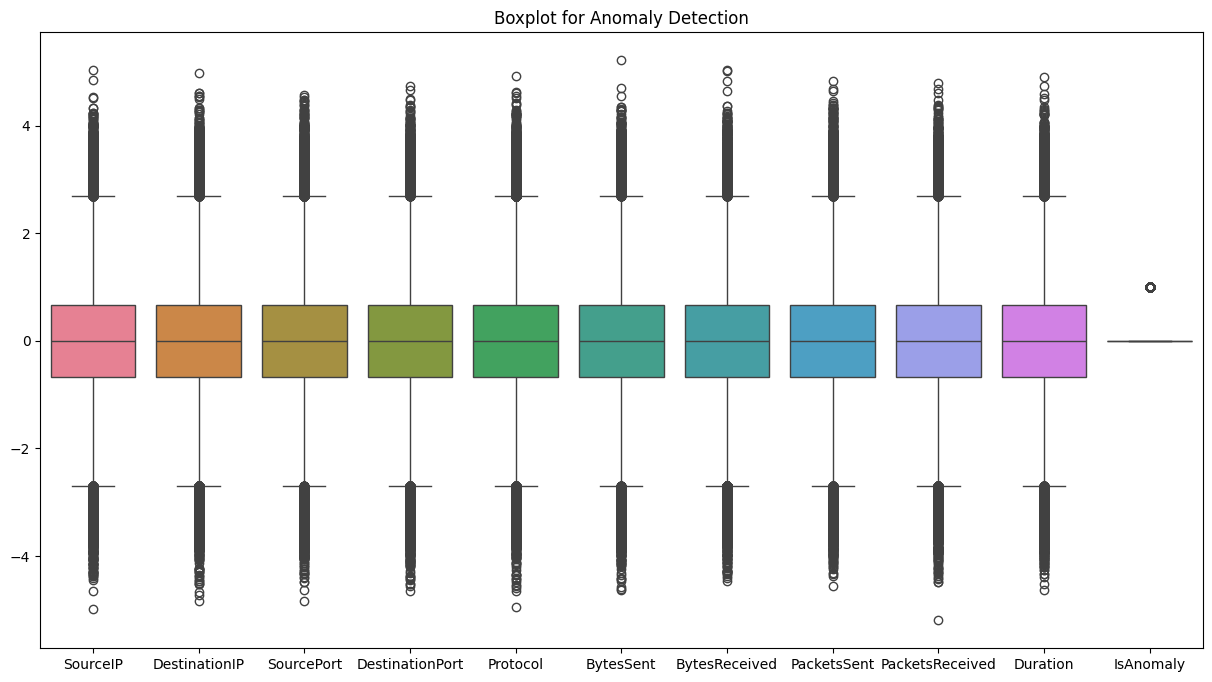

In [ ]:
# Function to detect anomalies or outliers using box plot
def detect_anomalies(df):
    try:
        plt.figure(figsize=(15, 8))
        sns.boxplot(data=df)
        plt.title('Boxplot for Anomaly Detection')
        plt.show()
    except Exception as e:
        print("An error occurred while detecting anomalies.")
        print(e)

detect_anomalies(network_data_cleaned)

In [ ]:
# Check if the data is already scaled
data_is_scaled = check_data_scaled(network_data_cleaned)

Data is not scaled.


In [ ]:
# Scale the dataframe if it's not scaled
if not data_is_scaled:
    # Scale the data
    network_data_scaled = scale_dataframe(network_data_cleaned)

# Check if scaling was successful
if network_data_scaled is not None:
    print("Data scaling successful.")
else:
    print("Data scaling failed.")

Data scaling successful.


In [ ]:
# Drop 'IsAnomaly' column
drop_column(network_data_cleaned)

Column 'IsAnomaly' dropped successfully.


In [ ]:
# Save the preprocessed data
preprocessed_file_path = 'preprocessed_network_data.csv'
network_data_cleaned.to_csv(preprocessed_file_path, index=False)